# Excercise Set 3

## Exercise 1: Importance sampling

### Part a:

Estimate the integral $\int_0^{\pi} \sin x dx$ and the uncertainty on the estimate by using a uniform sampling over the interval.

In [18]:
import numpy as np
import random

a = 0 #lower bound of integral
b = np.pi #upper bound of integral
interval = b - a #length of integral
N = 1000 #number of points chosen along interval

#define function for integrand
def f(x):
    return np.sin(x)


summation = 0 # contains running value of the sume that approximates the integral
sum_of_squares = 0 # contains the runnning sum of squares
for i in range (0,N): # carries out the sum by adding the integrand evaluated at N random (uniform) poinits along the interval
    x = np.pi*random.random()
    summation += f(x)
    sum_of_squares += f(x)**2
    
f_expected = summation/N # finds the expectation value of f (<f>) based on the points at which it was evaluated
integral = interval * f_expected # approximates the value of the integral as the expectation value of the function multiplied by the length of the interval

print ('The integral of sin(x) from 0 to pi is estimated to be %.15f using a uniform distrobution of %d points on the interval' % (integral, N))

f_squared_expected = (1/N) * sum_of_squares #calculates <f^2>
f_expected_squared = f_expected**2 #calculates <f>^2
sigma_f_squared = f_squared_expected - f_expected_squared # finds variance about the expectation value of f
sigma_I_squared = (1/N) * sigma_f_squared # finds  variandce about the approximation of the integral
sigma_I = np.sqrt(sigma_I_squared) #calculates standard deviation about the approximation of the integral

print ('The uncertainty on this integral is %.15f' % (sigma_I))

The integral of sin(x) from 0 to pi is estimated to be 2.039057049183419 using a uniform distrobution of 1000 points on the interval
The uncertainty on this integral is 0.009471087941819


### Part b

Plot the uncertainty estimate (from uniform sampling) as a function of N, the number of points evaluated. How does the uncertainty change with N?

<function matplotlib.pyplot.show>

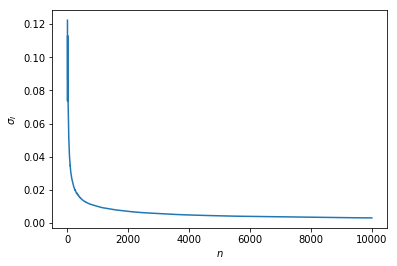

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

a = 0 # set lower bound of integral
b = np.pi # upper bound of integral
interval = b - a #length of integral
N = 10000 #number of points chosen along integral

def f(x): 
    return np.sin(x)

uncertainty_array = [] # array to contain the values of the uncertainty about the approximation of the integral
n_array = [] # array to contain the values of n

summation = 0
sum_of_squares = 0
for n in range (1,N):
    x = np.pi*random.random()
    summation += f(x)
    sum_of_squares += f(x)**2
    
    
    f_expected = summation/n
    f_squared_expected = (1/n) * sum_of_squares
    f_expected_squared = f_expected**2
    sigma_f_squared = f_squared_expected - f_expected_squared
    sigma_I_squared = (1/n) * sigma_f_squared
    sigma_I = np.sqrt(sigma_I_squared)
    
    uncertainty_array.append(sigma_I) #append sigma_I(n) to the array
    n_array.append(n) # append the value of n to the array
    
#convert arrays to vectors    
uncertainty_vector = np.asarray(uncertainty_array)
n_vector = np.asarray(n_array)

#PLOT!
plt.plot(n_vector[1:], uncertainty_vector[1:])
plt.xlabel('$n$')
plt.ylabel('$\sigma_I$')
plt.show

Note that the error decays assymptotically to 0

### Part c

Estimate the integral $\int_0^{\pi} \sin x dx$ and the uncertainty on the estimate by using importance sampling. (It may be helpful to note that $\sin x \approx \frac{4}{\pi^2}x(\pi - x)$ over the interval $[0,\pi]$.)

We start with

$I = \int_a^b f(x)dx = \int_a^b \frac{f(x)}{w(x)}w(x) dx$

now we define

$y = \int_a^x w(t)dt$ with $\int_a^b w(x)dx =1$

which (after some algebra) results in

$I = \int_{y^{-1}(a)}^{y^{-1}(b)} \frac{f(x(y))}{w(x(y))}dy \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{w(x_i)}$

We will define $f(x)$ to be $\sin x$ and $w(x)$ (our weighting function) to be $\frac{2 x}{\pi ^2}$

So $x(y) = \frac{\pi ^2 x}{2}$

where $y^{-1}(0) =  0$

and $y^{-1}(\pi) = \frac{\pi^3}{2}$

In [155]:
import numpy as

def f(x):
    return np.sin(x)

#define weighting function
def w(x):
    return (2*x)/np.pi**2

#define inverse of weighting function
def xx(y):
    return (np.pi**2*y)/2


N = 10000
sum = 0.
sum2 = 0.
for i in range(N): # approximates the avlue of the integral I by the approximation method described above
    y = random.uniform(xx(0),xx(np.pi)) # selects a random point in the interval y^(-1)(0) to y^(-1)(pi)
    x = xx(y)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
result = (sum/N) * (xx(np.pi)-xx(0))
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)

For N= 10000 :  1.5414043185731479 +/- 0.006881314288409437


### Part d:

Plot the uncertainty estimate (from imporance sampling) as a function of N, the number of points evaluated. How does the uncertainty chagne with N and how does it compare to part (b)?



<function matplotlib.pyplot.show>

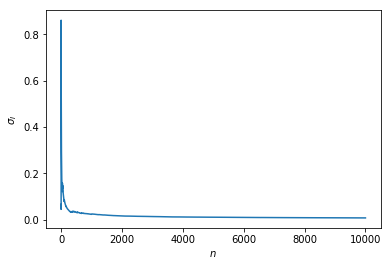

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(x):
    return np.sin(x)

def w(x):
    return (2*x)/np.pi**2


def xx(y):
    return (np.pi**2*y)/2

sigma_array = []
n_array = []

N = 10000

sum = 0.
sum2 = 0.

for n in range(1,N):
    
    n_array.append(n) #append value of n
    y = random.uniform(xx(0),xx(np.pi))
    x = xx(y)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
    result = (sum/n) * (xx(np.pi)-xx(0))
    sigma = np.sqrt((sum2/n - pow(sum/n,2))/n)
    sigma_array.append(sigma) #append value of sigma_I(n)
    
n_vector = np.asarray(n_array)
sigma_vector = np.asarray(sigma_array)

plt.plot(n_vector[1:], sigma_vector[1:])
plt.xlabel('$n$')
plt.ylabel('$\sigma_I$')
plt.show

The importance sampling uncertainty converges more rapidly to zero (though apparently, if the weighting function isn't particularly good, the integral can still be innacurate).

## Acceptance/rejection method

Use the von Neumann (acceptance / rejection) method to estimate the following integrals numerically, including uncertainties. (Each of these integrals presnts a new wrinkle in the calculations.) Motivate your choices of weighting functions for each of these integrals.

### Part a: $\int_1^2 x^2 dx$

We will define $w(x) = \frac{3}{7}x^2 $

In [56]:
import random
import numpy as np
import matplotlib.pyplot as plt

#define the original function in the integrand x^2
def f(x):
    return x**2
    
#defined the weighting function w(x)
def w(x):
    return (3/7)*x**2

#define the maximum value of w(x) over the interval 1 to 2
w0 = (12/7)

N = 50 #set the number of points under w(x) that must be found before termination
sum = 0 #define variable to store the vale of the sum that approximates the integral
sum2 = 0 #define variable to store the value of the sum of the squares used to approximate the uncertainty
naccepted = 0 #define a variable to store the number of points accepted so far
while naccepted < N:
    trial_x = random.uniform(1, 2) #set x to a random value between 1 and 2
    trial_y = random.uniform(0, w0) # set y to a random value between 0 and w0
    if trial_y < w(trial_x): #if the randomly selected point is below the curve of w(x)
        integrand = f(trial_x)/w(trial_x) #define the integrand
        sum += integrand
        sum2 += integrand**2
        naccepted += 1
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print ("For N=", N, ": ", result, "+/-", sigma)

For N= 50 :  2.3333333333333317 +/- 1.6323404237781944e-08


### Part b: $4 \int_0^1 \sqrt{1-x^2}dx$

We will define $w(x)=\frac{3}{10} \left(4-2 x^2\right)$

In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt

#define the original function in the integrand x^2
def f(x):
    return 4*np.sqrt(1-x**2)
    
#defined the weighting function w(x)
def w(x):
    return (3/10)*(4-2*x**2)

#define the maximum value of w(x) over the interval 0 to 1
w_max = (6/5)

#define the minimum value of w(x) over the intervale 0 to 1
w_min = (3/5)

N = 50 #set the number of points under w(x) that must be found before termination
sum = 0 #define variable to store the vale of the sum that approximates the integral
sum2 = 0 #define variable to store the value of the sum of the squares used to approximate the uncertainty
naccepted = 0 #define a variable to store the number of points accepted so far
while naccepted < N:
    trial_x = random.uniform(0, 1) #set x to a random value between 1 and 2
    trial_y = random.uniform(w_min, w_max) # set y to a random value between w_min and w_max
    if trial_y < w(trial_x): #if the randomly selected point is below the curve of w(x)
        integrand = f(trial_x)/w(trial_x) #define the integrand
        sum += integrand
        sum2 += integrand**2
        naccepted += 1
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print ("For N=", N, ": ", result, "+/-", sigma)

For N= 50 :  3.2451124249171306 +/- 0.02858950101339965


### Part c: $\int_0^2 (4-x^2)^{1/2} dx$

Define $w(x) = \frac{3}{10} \left(2-\frac{x^2}{4}\right)$

In [73]:
import random
import numpy as np
import matplotlib.pyplot as plt

#define the original function in the integrand x^2
def f(x):
    return np.sqrt(4-x**2)
    
#defined the weighting function w(x)
def w(x):
    return (3/10)*(2-((x**2)/4))

#define the maximum value of w(x) over the interval 0 to 1
w_max = (3/5)

#define the minimum value of w(x) over the intervale 0 to 1
w_min = (3/10)

N = 50 #set the number of points under w(x) that must be found before termination
sum = 0 #define variable to store the vale of the sum that approximates the integral
sum2 = 0 #define variable to store the value of the sum of the squares used to approximate the uncertainty
naccepted = 0 #define a variable to store the number of points accepted so far
while naccepted < N:
    trial_x = random.uniform(0, 2) #set x to a random value between 1 and 2
    trial_y = random.uniform(w_min, w_max) # set y to a random value between w_min and w_max
    if trial_y < w(trial_x): #if the randomly selected point is below the curve of w(x)
        integrand = f(trial_x)/w(trial_x) #define the integrand
        sum += integrand
        sum2 += integrand**2
        naccepted += 1
result = sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print ("For N =", N, ": ", result, "+/-", sigma)

For N = 50 :  3.2464805855013537 +/- 0.03026408542488724


## Exercise 3

We can use a random walk to estimate the probability for a low-energy netron to penetrate a thick lead wall. This was actualyl one of the orignal uses of the Monte Carlo method when it was developed at Los Alamos

Eahc neutron neters the lead wall in the x direction, at a right angle to the sruface, and it travels a unit distance (arbitrary units). Then it ollides with alead atom and rebounds in a random diraction. (Assume the scattering probability is uniform in $\theta$.) It travels a unit distance again before colliding with another lead atom and scattering in a new direction. After 15 collisions, the neutron has lost all of its energy and does not move any more.

### Part a:

If a beam of neutrons is incident on a lead wall 5 units think in the x direction and practicallly infinite int he y direction, what is the probability for a neutron to pass through to the other side of the wall? That is, how effective is the lead wall at shielding the neutrons?

In [220]:
import matplotlib.pyplot as plt
import random
import numpy as np

this_N = 15 # set number of random walk steps that will be taken

neutrons = 10000 # set number of random walks that will be simulated
success = 0 # set variable to keep track of number of successful penetrations through the lead

for n in range (0, neutrons):
    
    x=0 #start walk at origin
    y=0
    
    for i in range(0, this_N): 
        theta = random.uniform(0, 2*np.pi) #choose random direction
        x += np.cos(theta) #step in that direction
        y += np.sin(theta)
        if x >= 5: #if the particle penetrates through 5 unit distances, then count that as a success
            success += 1
            break
        if x <= 0: #if it comes back out the front of the lead plate, then the particle would not be scattered back into the plate, so it has escaped and will not penetrate!
            break
            
pass_through_probability = success/neutrons #calculates pass-through probability
print ('The probability of a neutron passing throgh the lead is %.15f percent' % (pass_through_probability * 100))
print ('The lead is %.15f percent effective at shielding neutrons' % ((1-pass_through_probability)*100))


The probability of a neutron passing throgh the lead is 3.540000000000000 percent
The lead is 96.460000000000008 percent effective at shielding neutrons


### Part b:

Draw the random walk of a sample neutron the penetrates the wall

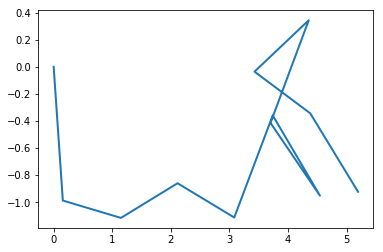

In [229]:
import matplotlib.pyplot as plt
import random
import numpy as np

N = 15

neutrons = 1000
success = 0

for n in range (0, neutrons):
    
    x=0
    y=0
    xvalues = [0] #stores x values of random walk
    yvalues = [0] #stores y values of random walk
    
    for i in range(0, N):
        theta = random.uniform(0, 2*np.pi)
        x += np.cos(theta)
        y += np.sin(theta)
        xvalues.append(x)
        yvalues.append(y)
        if x >= 5 and success < 1: #plots the path taken by the first succesful particle
            success += 1
            plt.plot(xvalues, yvalues,'-', lw=2)
            plt.show()
            break
            


### Part c:
Draw the histogram of the y coordinates where the netrons exit the wall, assuming they enter at y=0.

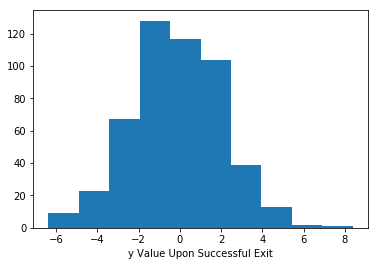

In [232]:
import matplotlib.pyplot as plt
import random
import numpy as np

N = 15

neutrons = 10000
yvalues=[] #keeps track of y values

for n in range (0, neutrons):
    x=0
    y=0
    
    for i in range(0, N):
        theta = random.uniform(0, 2*np.pi)
        x += np.cos(theta)
        y += np.sin(theta)
        if x >= 5:
            yvalues.append(y) # appends y values
            break

plt.hist(yvalues) #plots y values in histogram
plt.xlabel('y Value Upon Successful Exit')
plt.show()

This histogram is centered around 0 because the neutron is equally likely to scatter up as it is to scatter down and we start at the origin. These scattering events cancel each other out (on average) during the neutron's path in the positive x directions.

## Excercise 4: Metropolis method

Use the Metropolis algorithm to sample the normal (Gaussian) distrobution in one dimension.

### Part a:

For various step sizes, calculate the acceptance ratio (fraction of steps accepted) and the near-neighbor correlation functions C(k) (for k = 1, 2, 3 only). Why do the neighboring points of the random walk seem to be correlated?

In [405]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

for j in range(8,14): #vary the step size to find what generates an acceptance ration closest to 50%
    delta = (j+1)*0.25
    
    global_failed = 0 # keeps track o total number of rejected points

    def f(x): # define function for gaussian
        return (norm.pdf(x))

    def w(x): # define weighting function to be same as f(X)
        return (norm.pdf(x))

    def metropolis(x, w, delta):
        failed = 0 #set local variable of number of rejected points to zero
        while 1: #until a value is returned
            x_t = x + delta*random.uniform(-1,1) # takes  step no greater than delta in either direction
            r = w(x_t)/w(x) # if w(x_t)>w(x) or the proper probabilistic conditions are met, accpt the nex point x_t
            if r > random.random():
                return (x_t, failed) #returns values of x_t and the number of points that were rejected
            else:
                failed += 1 #otherwiser reject x_t

    N = 1000 #set number of x values we want 
    metropolis_x_values = [] #define array to contain x values
    metropolis_x_values.append(0) #append 0 to the x values to get started at x=0
    for i in range(N):
        x = metropolis_x_values[i] #start at some value of x defined in the previous itteratin
        metropolis_values = metropolis(x, w, delta) # stores return values of algorithm
        next_x = metropolis_values[0] #sets new value of x
        metropolis_x_values.append(next_x) #appends x value to list of x accepted x values
        global_failed += metropolis_values[1] # raise the global count of rejected points by the number of points rejected in this itteration

    acceptance_ratio = N/(N + global_failed) # find the acceptance ration

    print ('For a delta value of ',delta, 'the acceptance ratio is =', acceptance_ratio)

For a delta value of  2.25 the acceptance ratio is = 0.6075334143377886
For a delta value of  2.5 the acceptance ratio is = 0.5659309564233164
For a delta value of  2.75 the acceptance ratio is = 0.5230125523012552
For a delta value of  3.0 the acceptance ratio is = 0.49431537320810676
For a delta value of  3.25 the acceptance ratio is = 0.481000481000481
For a delta value of  3.5 the acceptance ratio is = 0.4317789291882556


From this we can tell delta = 2.75 is closest to the 0.5 acceptance ratio "rule of thumb" so we will use this value of delta.

The next cell calculates $C(k) = \frac{1}{N}\sum_{i=1}^N x_i x_{i+k}$ for $k=1, \;2, \;\mathrm{and} \; 3$ where $x_i$ is the $i$-th $x$-value accepted by the Metropolis algorithm.

In [423]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

def f(x): #define function of integrand
    return (norm.pdf(x))

def w(x): #define weighting function to be same as integrand
    return f(x)

def metropolis(x, w, delta):
    while 1:
        x_t = x + delta*random.uniform(-1,1)
        r = w(x_t)/w(x)
        if r > random.random():
            return x_t

delta = 3
N = 1000
metropolis_x_values = []
metropolis_x_values.append(0)
for i in range(N):
    x = metropolis_x_values[i]
    next_x = metropolis(x, w, delta)
    metropolis_x_values.append(next_x)
    
    
for k in range(1,4): #for neighbor distances ranging from 1 to 3
    sum = 0
    
    for j in range(N-k): #sum the multiplication values of x_i and x_(i+k) as described above to findd C(k)
        sum += metropolis_x_values[j]*metropolis_x_values[j+k]
    C_k = sum/(N-k)
    print ('For k = ', k, 'The near-neigbor correlation function C(k) returns a value of ', C_k)

For k =  1 The near-neigbor correlation function C(k) returns a value of  0.29579528101765595
For k =  2 The near-neigbor correlation function C(k) returns a value of  0.11092516428612317
For k =  3 The near-neigbor correlation function C(k) returns a value of  0.030260928311172115


If the near neighbors were not correlated, we found find $C(k) \approx \frac{1}{4}$.

This is not seen however, stemming from the fact that every value of $x_{i+k}$ must be within $k$*delta of the value of $x_i$.

### Part b:

Use the random numbers you generated during the sampling to calculate

$$\int_{-\infty}^{\infty} x^2 e^{-\frac{1}{2}x^2} dx$$

In [426]:
def f(x): # define function of integrand
    return (x**2)*np.exp((x**2)/(-2))

fsum = 0 # variable to keep track of value of running sum
for i in metropolis_x_values: #evaluate and sum f(x) at the values of x found in the metropolis algorithm of the gaussian
    fsum += f(i)
result = (fsum/len(metropolis_x_values))*(max(metropolis_x_values) - min(metropolis_x_values)) #define <f> to be the average value of f evaluated at the points found by the metropolis algorithm, then multiply by the length of the domain defined by the x values found in the metropolis algorithm to approximate the integral
print (result) #print he result

2.516902936790067


## Exercise 5: Thermodynamic properties of ferromagnetic 1-D Ising model in equilibrium

### Part a:

Calculate the internal energy $U$ and the magnetization $M$ for the chain with $N = 100$

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXXOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXXOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOOOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXXOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOXOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXXOOOOOOOOOOOOOOOOXOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOXOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXXOOXOOOOOOOOOOOOOXOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOXOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOOOOOXXOOXOOOOOOOOOOOOOXOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOXOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOXOOOXXOOXOOOOOOOOOOOOOXOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOXOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOXOOOXXOOXOOOOOOOOXOOOOXOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOOOOOOOOXOO 

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOXOOOXXOOXOOOOOOOOXOOOOXOOOOOOOOOOOOOOXOO

XOXOXOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXXXXOXXOXOXXOXXXOOXOXOOOXOXXOXOXOOOOOXXOOOOXXOOXOXXOOXXOOOXOOX 

XOXOXOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXXXXOXXOXOXXOXXXOOXOXOOOXOXXOXOXOOOOOXXOOOOXXOOXOXXOOXXOOXXOOX 

XOXOXOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXXXXOXXOXOXXOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXXOOXXOOXXOOX 

XOXOXOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXXXXOXXOXOXXOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXOOOXXOOXXOOX 

XOXOOOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXXXXOXXOXOXXOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXOOOXXOOXXOOX 

XOXOOOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXOXXOXXOXOXXOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXOOOXXOOXXOOX 

XOXOOOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXOOXOXXOXOXXOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXOOOXXOOXXOOX 

XOXOOOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXOXOOXOXXOXOXOOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXOOOXXOOXXOOX 

XOXOOOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXXXOOXOXXOXOXOOXXXOOXOXOOOXOXXOXOOOOOOOXXOOOOXXOOXOXOOOXXOOXXOOX 

XOXOOOXXOOXOOXXXXXOOXOXXXOOOOXXOOOXOXXXOOXOXXOXOXXOXXXOOXOXOOOXOXXOXOOOOO

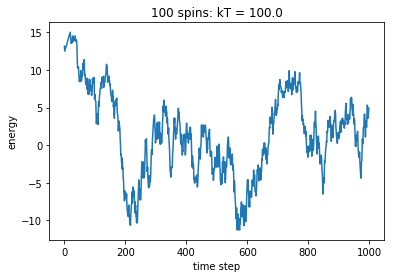

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

N  = 100 #number of spin states
B  = 1    # magnetic field
mu = .33  # constant g*mu
J  = .20  # exchange energy
k  = 1    # Boltzman constant
T  = 100  # tempurature
state = np.zeros(N) # this vector will be filled with the initial spin states
random.seed()

def energy(S):
    FirstTerm = 0
    SecondTerm = 0
    for i in range(0,N-1):
        FirstTerm += -J * S[i]*S[i+1] # sums the energy corresponding to spin-spin interactions
    FirstTerm += -J * S[N-1]*S[0]     # periodic boundary: the Nth element in the chain is the neighbor of the 1st
    for i in range(0,N):
        SecondTerm += -mu*S[i]*B      # sums the energy corresponding to the magnetic field's interraction with the spin of the particles
    return (FirstTerm + SecondTerm)   # returns total energy calculation

for i in range(0,N):
    state[i] = -1 #set all spin states to be spin down (cold start)

ES = energy(state) # defines a variable to store the energy value of the current state

num_steps = 10*N #sets the number of times we will consider flipping the spin state of a random particle
energy_values = [] #contains energy values calculated in each step
step_index_values = [] #stores the index of all the steps
for istep in range(num_steps):
    test_state = list(state) #converts current state array to a list that will be modified
    random_site = int(N*random.random()) #selects random integer between 0 and N-1 (could choose N-1 but this event is incredibly rare)
    test_state[random_site] *= -1 # flip the spin of a random lattice site in the test list
    ET = energy(test_state) # defines variable to store the energy value of the test state
    R = np.exp((ES-ET)/(k*T)) # defines boltzman-factor to define the probability of the flip taking place
    if R > random.random(): # commit to the flip if either ET > ES or in the case that ES < ET, if the probability condition for the flip to occur is met
        state = test_state 
        ES = ET
    # otherwise the state stays the same as it was
    
    energy_values.append(ES) # store the value of the energy after either commiting to or not commiting to the flip
    step_index_values.append(istep) # store the index value of the step that was just completed
    row = ''
    for site in state:
        if site==1.0:
            row += 'X'
        else:
            row += '\x1b[31mO\x1b[0m'
        
    print(row, '\n')
    
plt.plot(step_index_values, energy_values)
plt.xlabel('time step')
plt.ylabel('energy')
plt.title('%d spins: kT = %.1f' % (N, k*T))
plt.show()
    

In [434]:
import numpy as np
import random
import matplotlib.pyplot as plt

N  = 100 #number of spin states
B  = 0    # magnetic field
mu = .33  # constant g*mu
J  = .20  # exchange energy
k  = 1    # Boltzman constant
T  = 100  # tempurature
state = np.zeros(N) # this vector will be filled with the initial spin states
random.seed()

def energy(S):
    FirstTerm = 0
    SecondTerm = 0
    for i in range(0,N-1):
        FirstTerm += -J * S[i]*S[i+1] # sums the energy corresponding to spin-spin interactions
    FirstTerm += -J * S[N-1]*S[0]     # periodic boundary: the Nth element in the chain is the neighbor of the 1st
    for i in range(0,N):
        SecondTerm += -mu*S[i]*B      # sums the energy corresponding to the magnetic field's interraction with the spin of the particles
    return (FirstTerm + SecondTerm)   # returns total energy calculation

for i in range(0,N):
    state[i] = -1 #set all spin states to be spin down (cold start)

ES = energy(state) # defines a variable to store the energy value of the current state

num_steps = 10*N #sets the number of times we will consider flipping the spin state of a random particle
energy_values = [] #contains energy values calculated in each step
step_index_values = [] #stores the index of all the steps
for istep in range(num_steps):
    test_state = list(state) #converts current state array to a list that will be modified
    random_site = int(N*random.random()) #selects random integer between 0 and N-1 (could choose N-1 but this event is incredibly rare)
    test_state[random_site] *= -1 # flip the spin of a random lattice site in the test list
    ET = energy(test_state) # defines variable to store the energy value of the test state
    R = np.exp((ES-ET)/(k*T)) # defines boltzman-factor to define the probability of the flip taking place
    if R > random.random(): # commit to the flip if either ET > ES or in the case that ES < ET, if the probability condition for the flip to occur is met
        state = test_state 
        ES = ET
    # otherwise the state stays the same as it was
    
    energy_values.append(ES) # store the value of the energy after either commiting to or not commiting to the flip
    step_index_values.append(istep) # store the index value of the step that was just completed
    row = ''

magnetization = 0
for k in range(N):
    magnetization += state[k]    
    
print ('The total energy U(T) = ', ES)
print ('The total magnetization M(T) =', magnetization)
    

The total energy U(T) =  1.5999999999999999
The total magnetization M(T) = 0.0


### Part b:

Calculate the internal energy U and the magnetization M for the chain with N = 100.

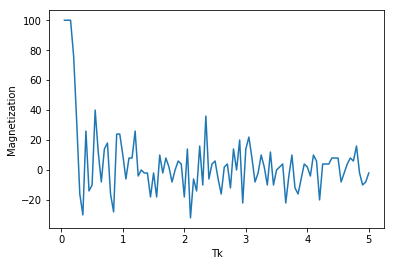

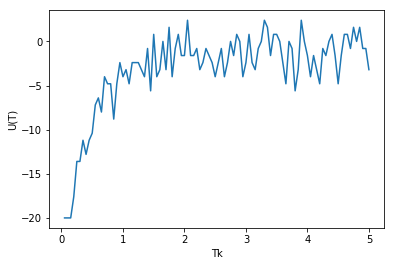

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

energy_array = []
temperature_array = []
magnetization_array = []

for t in range(1,101):
    T = t*0.05
    N  = 100 #number of spin states
    B  = 0    # magnetic field (set to zero because of definition of U(T))
    mu = .33  # constant g*mu
    J  = .20  # exchange energy
    k  = 1    # Boltzman constant
    state = np.zeros(N) # this vector will be filled with the initial spin states
    random.seed()

    def energy(S):
        FirstTerm = 0
        SecondTerm = 0
        for i in range(0,N-1):
            FirstTerm += -J * S[i]*S[i+1] # sums the energy corresponding to spin-spin interactions
        FirstTerm += -J * S[N-1]*S[0]     # periodic boundary: the Nth element in the chain is the neighbor of the 1st
        for i in range(0,N):
            SecondTerm += -mu*S[i]*B      # sums the energy corresponding to the magnetic field's interraction with the spin of the particles
        return (FirstTerm + SecondTerm)   # returns total energy calculation

    for i in range(0,N):
        state[i] = 1 #set all spin states to be spin down (cold start)

    ES = energy(state) # defines a variable to store the energy value of the current state

    num_steps = 10*N #sets the number of times we will consider flipping the spin state of a random particle
    energy_values = [] #contains energy values calculated in each step
    step_index_values = [] #stores the index of all the steps
    for istep in range(num_steps):
        test_state = list(state) #converts current state array to a list that will be modified
        random_site = int(N*random.random()) #selects random integer between 0 and N-1 (could choose N-1 but this event is incredibly rare)
        test_state[random_site] *= -1 # flip the spin of a random lattice site in the test list
        ET = energy(test_state) # defines variable to store the energy value of the test state
        R = np.exp((ES-ET)/(k*T)) # defines boltzman-factor to define the probability of the flip taking place
        if R > random.random(): # commit to the flip if either ET > ES or in the case that ES < ET, if the probability condition for the flip to occur is met
            state = test_state 
            ES = ET
        # otherwise the state stays the same as it was

        energy_values.append(ES) # store the value of the energy after either commiting to or not commiting to the flip
        step_index_values.append(istep) # store the index value of the step that was just completed
        row = ''
        
    magnetization = 0
    for k in range(N):
        magnetization += state[k]
        
    magnetization_array.append(magnetization)
    energy_array.append(ES)
    temperature_array.append(T)
    
energy_vector = np.asarray(energy_array)
temperature_vector = np.asarray(temperature_array)
magnetization_vector = np.asarray(magnetization_array)

plt.plot(temperature_vector, magnetization_vector)
plt.xlabel('Tk')
plt.ylabel('Magnetization')
plt.show()

plt.plot(temperature_vector, energy_vector)
plt.xlabel('Tk')
plt.ylabel('U(T)')
plt.show()


Similar to the plots in the textbook, the Magnetization fluctuates around 0 and the value o the energy increases to some equilibrium value. THIS MAKES SENSE! Temperature allows some disorder to slip into the system, causing the spin states to misallign, which results in both the magnetization hovering around 0 and the energy increasing in a temperature dependant way (awy from lowest energy state of full spin allignment).

### Part c:

Show that the agreement with the analytic results in section 17.3.1 is better for N = 2000 then for N = 200

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

energy_array = []
temperature_array = []
magnetization_array = []

for t in range(1,11):
    T = 3
    N  = 2000 #number of spin states
    B  = 0    # magnetic field (set to zero because of definition of U(T))
    mu = .33  # constant g*mu
    J  = .20  # exchange energy
    k  = 1    # Boltzman constant
    state = np.zeros(N) # this vector will be filled with the initial spin states
    random.seed()

    def energy(S):
        FirstTerm = 0
        SecondTerm = 0
        for i in range(0,N-1):
            FirstTerm += -J * S[i]*S[i+1] # sums the energy corresponding to spin-spin interactions
        FirstTerm += -J * S[N-1]*S[0]     # periodic boundary: the Nth element in the chain is the neighbor of the 1st
        for i in range(0,N):
            SecondTerm += -mu*S[i]*B      # sums the energy corresponding to the magnetic field's interraction with the spin of the particles
        return (FirstTerm + SecondTerm)   # returns total energy calculation

    for i in range(0,N):
        state[i] = 1 #set all spin states to be spin down (cold start)

    ES = energy(state) # defines a variable to store the energy value of the current state

    num_steps = 10*N #sets the number of times we will consider flipping the spin state of a random particle
    energy_values = [] #contains energy values calculated in each step
    step_index_values = [] #stores the index of all the steps
    for istep in range(num_steps):
        test_state = list(state) #converts current state array to a list that will be modified
        random_site = int(N*random.random()) #selects random integer between 0 and N-1 (could choose N-1 but this event is incredibly rare)
        test_state[random_site] *= -1 # flip the spin of a random lattice site in the test list
        ET = energy(test_state) # defines variable to store the energy value of the test state
        R = np.exp((ES-ET)/(k*T)) # defines boltzman-factor to define the probability of the flip taking place
        if R > random.random(): # commit to the flip if either ET > ES or in the case that ES < ET, if the probability condition for the flip to occur is met
            state = test_state 
            ES = ET
        # otherwise the state stays the same as it was

        energy_values.append(ES) # store the value of the energy after either commiting to or not commiting to the flip
        step_index_values.append(istep) # store the index value of the step that was just completed
        row = ''
        for site in state:
            if site==1.0:
                row += 'X'
            else:
                row += '\x1b[31mO\x1b[0m'
    
    magnetization = 0
    for k in range(N):
        magnetization += state[k]
        
    magnetization_array.append(magnetization)
    energy_array.append(ES)
    temperature_array.append(T)
    
energy_vector = np.asarray(energy_array)
temperature_vector = np.asarray(temperature_array)
magnetization_vector = np.asarray(magnetization_array)

plt.plot(temperature_vector, magnetization_vector)
plt.xlabel('Tk')
plt.ylabel('Magnetization')
plt.show()

plt.plot(temperature_vector, energy_vector)
plt.xlabel('Tk')
plt.ylabel('U(T)')
plt.show()


As one would expect, there the fluctuations from theoretical values are less significant when N is larger.